# Kopp21 et al 2021 Exploratory Data Analysis
**Authorship:**
Adam Klie, *08/07/2022*
***
**Description:**
This notebook is meant to be a quick exploratory data analysis of the Kopp21 et al (2021) dataset. The goal is to get a feel for the data and to identify any issues that may need to be addressed before we can begin to analyze the data.
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload 
%autoreload 2

import os
import numpy as np
import pandas as pd
import eugene as eu

# Configure EUGENe 
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/jund"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jund" 

Global seed set to 13


0.1.0


# Data Extraction

In [2]:
sdata = eu.dl.read_h5sd(
    filename=os.path.join(eu.settings.dataset_dir, "kopp21", "junD", "jund_processed.h5sd"),
)
sdata

# Data Visualization

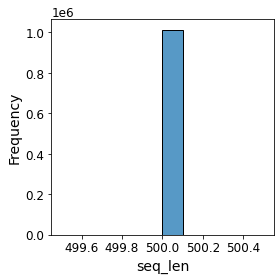

In [3]:
# Double check that the sequences are the same length
eu.pl.histplot(
    sdata, 
    keys="seq_len", 
    orient="h",
    bins=10,
    figsize=(4,4)
)

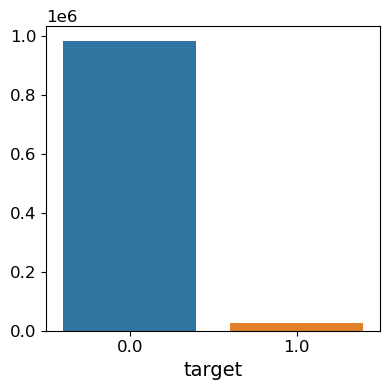

In [4]:
# See the distribution of sequence labels, its clear we have some unbalanced classes
eu.pl.countplot(
    sdata,
    keys="target",
    figsize=(4,4)
)

In [5]:
def Set_Chr_Nr_ (Chr):
    """ Sort by chromosome """
    if Chr: 
        New = Chr[3:]
        if New == 'X': New = 23
        elif New == 'Y': New = 24
        elif New == 'M': New = 25
        else: New = int(New)
    else:
        New = 0
    return New
ord = sorted(np.unique(sdata["chr"].values), key=lambda x: Set_Chr_Nr_(x))

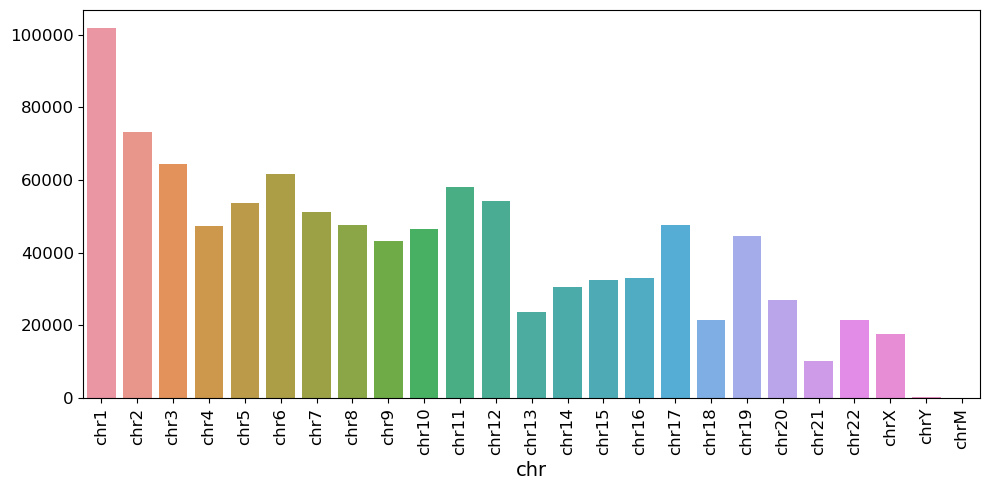

In [6]:
# Check the distribution of sequences on chromosomes
eu.pl.countplot(
    sdata,
    keys="chr",
    xtick_rot=90,
    order=ord
)

---

# Scratch